# 자동으로 모델을 학습시켜주는 AutoKeras 설치하기

- [AutoKeras](https://pycaret.org/)은 low-code로 machine learning을 구현할 수 있도록 도와줍니다

- AutoKeras를 사용하기 위해 설치를 먼저 진행해줍니다

In [1]:
!pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 46.7 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
import autokeras as ak

import pandas as pd
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

import os
from tqdm import tqdm

Using TensorFlow backend


# 전체 암호화폐 데이터 가져오기


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [57]:

csvs = os.listdir("/content/drive/MyDrive/coin_data/days/")


In [65]:
dfs = []
for csv in tqdm(csvs):
  df = pd.read_csv(f"/content/drive/MyDrive/coin_data/days/{csv}")
  dfs.append(df)

100%|██████████| 101/101 [00:00<00:00, 151.73it/s]


# 하나의 DataFrame으로 만들어주기

In [74]:
df = pd.concat(dfs).reset_index(drop=True)

# 데이터의 단위를 작게 만들어주기
- 값이 너무 크면 모델 학습에 악영향을 끼칠 수 있으니 log를 씌워줍니다

In [75]:
log_columns = ["open", "high", "low", "close", "trade_price", "trade_volume"]
df[log_columns] = np.log1p(df[log_columns])

# KRW-ETH를 테스트 데이터로, 그 외 모든 암호화폐는 학습용 데이터로 구분

In [95]:
eth_df = df[df["market"]=="KRW-ETH"]
train_df = df.drop(index=eth_df.index).reset_index(drop=True)
train_df

,market,datetime,open,high,low,close,trade_price,trade_volume,change_rate
0,KRW-BTC,2017-09-25T09:00:00,15.250833,15.281771,15.244625,15.279229,20.143831,4.893987,0.028803
1,KRW-BTC,2017-09-26T09:00:00,15.278072,15.301198,15.276681,15.278998,18.415741,3.169196,-0.000231
2,KRW-BTC,2017-09-27T09:00:00,15.279229,15.358168,15.278303,15.353882,18.791055,3.504646,0.077760
3,KRW-BTC,2017-09-28T09:00:00,15.353882,15.378276,15.323802,15.338519,19.734904,4.401685,-0.015246
4,KRW-BTC,2017-09-29T09:00:00,15.338519,15.364986,15.314241,15.353882,19.422987,4.100200,0.015482
...,...,...,...,...,...,...,...,...,...
170515,KRW-NEAR,2024-01-17T09:00:00,8.402007,8.439448,8.375860,8.425297,23.366650,14.954825,0.025872
170516,KRW-NEAR,2024-01-18T09:00:00,8.424200,8.440528,8.338306,8.359603,23.092812,14.699648,-0.063596
170517,KRW-NEAR,2024-01-19T09:00:00,8.359603,8.365440,8.265136,8.334712,23.025050,14.708569,-0.024590
170518,KRW-NEAR,2024-01-20T09:00:00,8.334712,8.334712,8.288032,8.316545,22.036269,13.727333,-0.018007


# train_df로 X_train, y_train 및 eth_df로 X_test, y_test 만들기

In [77]:
X_train = train_df[["open", "high", "low", "trade_price", "trade_volume"]]
X_test = eth_df[["open", "high", "low", "trade_price", "trade_volume"]]
y_train = train_df[["close"]]
y_test = eth_df[["close"]]

# AutoKeras 기반의 예측 모델 선언

In [78]:
reg = ak.StructuredDataRegressor(
    overwrite=True, max_trials=3
)

# 모델 학습시키기

In [79]:
reg.fit(
    X_train,
    y_train,
    validation_split=0.05,
    epochs=10,
)

Trial 3 Complete [00h 01m 42s]
val_loss: 0.10162831097841263

Best val_loss So Far: 0.0019264613511040807
Total elapsed time: 00h 05m 11s
Epoch 1/10
5329/5329 [==============================] - 9s 2ms/step - loss: 13.5308 - mean_squared_error: 13.5308
Epoch 2/10
5329/5329 [==============================] - 8s 2ms/step - loss: 0.0159 - mean_squared_error: 0.0159
Epoch 3/10
5329/5329 [==============================] - 8s 2ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 4/10
5329/5329 [==============================] - 8s 2ms/step - loss: 0.0062 - mean_squared_error: 0.0062
Epoch 5/10
5329/5329 [==============================] - 8s 1ms/step - loss: 0.0050 - mean_squared_error: 0.0050
Epoch 6/10
5329/5329 [==============================] - 8s 2ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 7/10
5329/5329 [==============================] - 8s 2ms/step - loss: 0.0025 - mean_squared_error: 0.0025
Epoch 8/10
5329/5329 [==============================] - 8s 2ms/step - loss: 

# 학습 시 사용하지 않은 데이터로 가격 예측

In [80]:
y_pred = reg.predict(X_test)

73/73 [==============================] - 0s 1ms/step


# 예측값, 실제값을 하나의 DataFrame으로 구성하기
- log 씌웠던 값을 np.exp로 다시 원상복구 해줍니다

In [87]:
result_df = np.exp(pd.DataFrame([y_pred.flatten(), y_test.values.flatten()]).T)
result_df.columns = ["y_pred", "y_test"]
result_df["y_pred"] = round(result_df["y_pred"], 0)

# 예측값과 실제값 시각화로 비교해보기

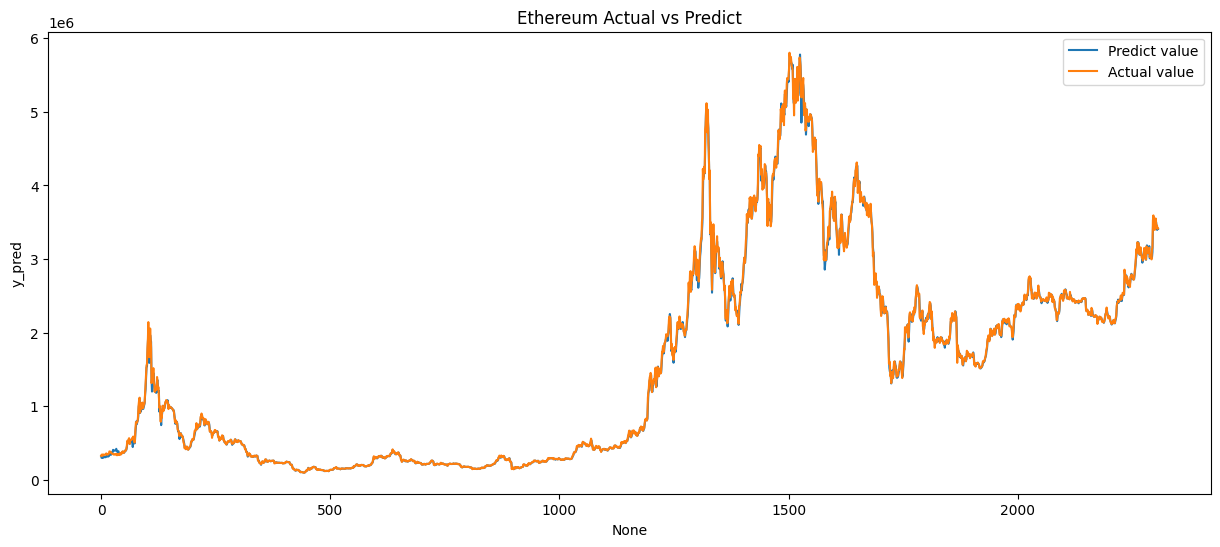

In [96]:
plt.figure(figsize=(15,6))
sns.lineplot(
    x=result_df.index,
    y=result_df["y_pred"],
    label="Predict value"
)
sns.lineplot(
    x=result_df.index,
    y=result_df["y_test"],
    label="Actual value"
)
plt.title("Ethereum Actual vs Predict")
plt.show()